In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
import cv2
from matplotlib import pyplot as plt

In [2]:
std = 0.5
mean = 0.5
mnist = datasets.MNIST("./data",
                       train=True,
                       download=True,
                      )

data_1d = mnist.data[:,12:13,:].to(torch.float) / 255
noise = torch.normal(
    mean=0.5,
    std=0.5,
    size=data_1d.shape,
)
noisy_data_1d = noise.add(data_1d)

/Users/helena/.virtualenvs/thesis/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9020,
         0.9922, 0.3608, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]])


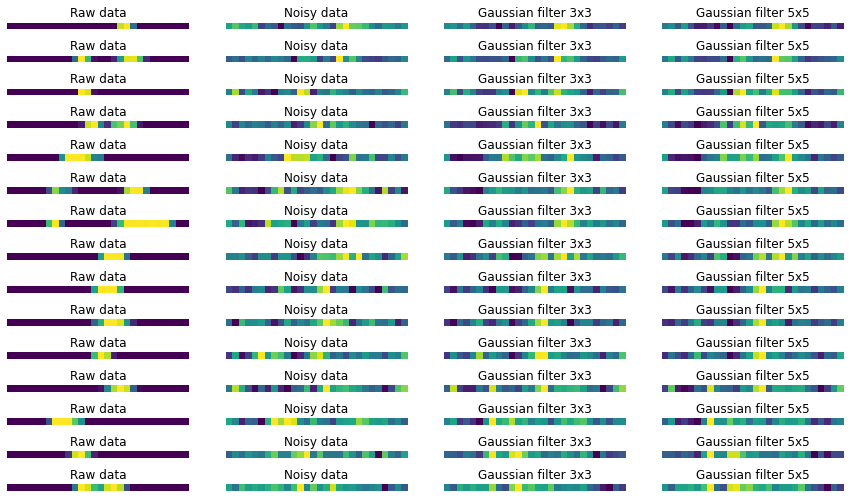

In [7]:
g3_filtered_data_1d = cv2.GaussianBlur(np.array(noisy_data_1d), (1,3), 0)
g5_filtered_data_1d = cv2.GaussianBlur(np.array(noisy_data_1d), (1,5), 0)

print(data_1d[500])

rows = 15
columns = 4
fig = plt.figure(figsize=(15, rows*0.6))

for i in range(rows):
    fig.add_subplot(rows, columns, i*columns+1)
    plt.imshow(data_1d[500 + i])
    plt.axis('off')
    plt.title("Raw data")

    fig.add_subplot(rows, columns, i*columns+2)
    plt.imshow(noisy_data_1d[500 + i])
    plt.axis('off')
    plt.title("Noisy data")

    fig.add_subplot(rows, columns, i*columns+3)
    plt.imshow(g3_filtered_data_1d[500 + i])
    plt.axis('off')
    plt.title("Gaussian filter 3x3")
    
    fig.add_subplot(rows, columns, i*columns+4)
    plt.imshow(g5_filtered_data_1d[500 + i])
    plt.axis('off')
    plt.title("Gaussian filter 5x5")

In [4]:
std = 0.5
mean = 0.5
mnist = datasets.MNIST("./data",
                       train=True,
                       download=True,
                      )

data = mnist.data.to(torch.float) / 255
noise = torch.normal(
    mean=0.5,
    std=0.5,
    size=data.shape,
)
noisy_data = noise.add(data)

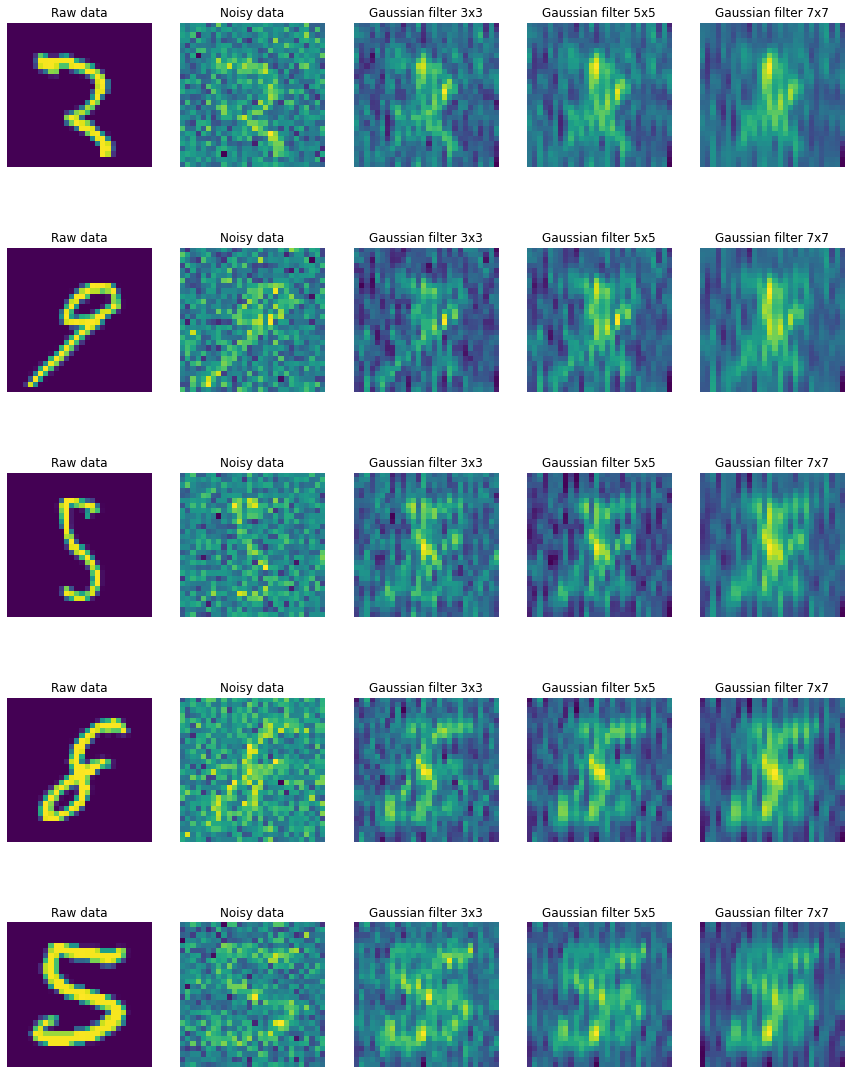

In [5]:
g_filtered_data = cv2.GaussianBlur(np.array(noisy_data), (3,3), 0)
g_filtered_data_5 = cv2.GaussianBlur(np.array(noisy_data), (5,5), 0)
g_filtered_data_7 = cv2.GaussianBlur(np.array(noisy_data), (7,7), 0)

rows = 5
columns = 5
fig = plt.figure(figsize=(15, rows*4))

for i in range(rows):
    fig.add_subplot(rows, columns, i*columns+1)
    plt.imshow(data[500 + i])
    plt.axis('off')
    plt.title("Raw data")

    fig.add_subplot(rows, columns, i*columns+2)
    plt.imshow(noisy_data[500 + i]) #noisy_data
    plt.axis('off')
    plt.title("Noisy data")

    fig.add_subplot(rows, columns, i*columns+3)
    plt.imshow(g_filtered_data[500 + i])
    plt.axis('off')
    plt.title("Gaussian filter 3x3")
    
    fig.add_subplot(rows, columns, i*columns+4)
    plt.imshow(g_filtered_data_5[500 + i])
    plt.axis('off')
    plt.title("Gaussian filter 5x5")
        
    fig.add_subplot(rows, columns, i*columns+5)
    plt.imshow(g_filtered_data_7[500 + i])
    plt.axis('off')
    plt.title("Gaussian filter 7x7")